# Векторы на плоскости

Этот набор задач предназначен для прорешивания в аудитории. Вам предстоит работать с точками на плоскости и векторами. Векторы заданы своими координатами в некотором фиксированном правом ортонормированном базисе; вектор с координатами `x`, `y` задаётся как `v = np.array([x,y])`. Каждая точка задана соответствующим радиус-вектором. Над векторами можно выполнять следующие операции: умножать вектор на число `c*v` (здесь `c` — это число),  складывать векторы `v+u` (здесь `u` — это другой вектор), вычитать `v-u`, вычислять скалярное произведение `np.dot(u, v)` и обращаться к координатам `v[0]` и `v[1]`. Чтобы избежать ошибок, рекомендуем для запуска тестирования всегда использовать «Run All». *Подсказка:* при решении задачи вам могут пригодиться решения предыдущих задач.

**1. Точка на отрезке.**
Допишите функцию, которая по числу $a \in [0,1]$ возвращает радиус-вектор $\vec{z}$ точки, которая расположена на отрезке с концами, заданными радиус-векторами $\vec{x}$ и $\vec{y}$, и для которой выполняется $|\vec{z} - \vec{x}| = a|\vec{y} - \vec{x}|$.

In [9]:
def segment_point(x, y, a):
    '''Точка z на отрезке [x,y], такая что |x-z| = a|x-y|'''
    
    return (1-a)*x+a*y

Проверьте, что ваше решение проходит тесты:

In [11]:
import numpy as np
z1 = segment_point(np.array([1,1]), np.array([2,2]), 0.5)
z2 = segment_point(np.array([1,0]), np.array([2,3]), 2/3)
if abs(z1[0] - 1.5) >= 1e-9 or abs(z1[1] - 1.5) >= 1e-9:
    print('Тест 1 не пройден')
elif abs(z2[0] - 5/3) >= 1e-9 or abs(z2[1] - 2) >= 1e-9:
    print('Тест 2 не пройден')
else:
    print('Все тесты пройдены')

Все тесты пройдены


**2. Система уравнений 2×2.** Допишите функцию, решающую систему уравнений:
$$\left\{\begin{array}{l} a_1 x + b_1 y = c_1, \\ a_2 x + b_2 y = c_2.\end{array}\right.$$
Гарантируется, что решение есть и при том единственное. В учебных целях просим не использовать готовые решения типа `np.linalg.solve`. Техническое напоминание: чтобы сравнить `x` с нулём, пишите `abs(x) < 1e-9`, а не `x == 0`. Обратите внимание, что `a1`, `a2`, `b1`, `b2` могут быть равны нулю!

In [12]:
def solve_system(a1, a2, b1, b2, c1, c2):
    '''Решение системы a1*x + b1*y = c1, a2*x + b2*y = c2'''
    delta = a1*b2-a2*b1
    deltaX = c1*b2-c2*b1
    deltaY = a1*c2-a2*c1
    x = deltaX/delta
    y = deltaY/delta
    return np.array([x, y])

Проверьте, что ваше решение проходит тесты:

In [13]:
sol1 = solve_system(0, 1/3, 6, 2, 2, 9)
sol2 = solve_system(2, 1, -1, 0.2, 0.5, 0.3)
sol3 = solve_system(0, 5, 6, 0, 1, 1)
if abs(sol1[0] - 25) >= 1e-9 or abs(sol1[1] - 1/3) >= 1e-9:
    print('Тест 1 не пройден')
elif abs(sol2[0] - 2/7) >= 1e-9 or abs(sol2[1] - 1/14) >= 1e-9:
    print('Тест 2 не пройден')
elif abs(sol3[0] - 1/5) >= 1e-9 or abs(sol3[1] - 1/6) >= 1e-9:
    print('Тест 3 не пройден')
else:
    print('Все тесты пройдены')

Все тесты пройдены


**3. Смена базиса.** Допишите функцию, которая представляет данный вектор `w` в координатах нового базиса `x, y`. Например, при `w=[1,1]`, `x=[-1,0]` и `y=[0,2]` функция вернёт `v=[-1,0.5]`. Гарантируется, что векторы базиса, т.е. `x` и `y`, не коллинеарны.

In [14]:
def change_basis(w, x, y):
    '''Перевод вектора w в базис x, y'''
    delta = x[0]*y[1] - x[1]*y[0]
    deltaX = w[0]*y[1] - w[1]*y[0]
    deltaY = x[0]*w[1] - x[1]*w[0]
    v = np.array([deltaX/delta, deltaY/delta])
    return v

Проверьте, что ваше решение проходит тесты:

In [15]:
sol1 = change_basis(np.array([1,1]), np.array([-1,0]), np.array([0,2]))
sol2 = change_basis(np.array([4.5,2.5]), np.array([1.5,2]), np.array([-1,1]))
if abs(sol1[0] - -1) >= 1e-9 or abs(sol1[1] - 0.5) >= 1e-9:
    print('Тест 1 не пройден')
elif abs(sol2[0] - 2) >= 1e-9 or abs(sol2[1] - -1.5) >= 1e-9:
    print('Тест 2 не пройден')
else:
    print('Все тесты пройдены')

Все тесты пройдены


**4. Искривлённое изображение.**
Допишите следующую функцию. На вход вам дано изображение `image` размера `w`  на `h` и четыре точки (радиус-векторы) `p0`, `p1`, `p2` и `x`. Каждый пиксель изображения (`image[i,j]`, где `0<=i<w` и `0<=j<h`) — это число от 0 до 255, задающее градацию серого от чёрного до белого. Изображение `image`  «натянуто» на  параллелограмм с вершинами `p0`, `p1`, `p2`, как на рисунке (четвёртая вершина параллелограмма, `p3 = p0 + (p1-p0) + (p2-p0)`, не изображена, но подразумевается):

![Натянутое image](https://imgur.com/B4Wj7Hz.png)

Считайте, что левый и правый нижние пиксели изображения расположены, соответственно, в `image[0,0]` и `image[w-1,0]`. Верните 0, если точка `x` не лежит в этом параллелограмме, и верните соответствующий пиксель  изображения `image` в противном случае. Если `x` лежит на границе двух и более «растянутых пикселей», то верните цвет любого из них.

In [20]:
def get_pixel(p0, p1, p2, x, image):
    '''Пиксель, соответствующий x в изображении, натянутом на p0,p1,p2,p3'''
    w = image.shape[0]
    h = image.shape[1]
    z = change_basis((x-p0), (p1-p0), (p2-p0))
    
    if 0 <= z[0] < 1 and 0 <= z[1] < 1:
        return image[int(z[0]*w), int(z[1]*h)]
    else:
        return 0


Проверьте, что ваше решение генерирует искривлённую картинку:

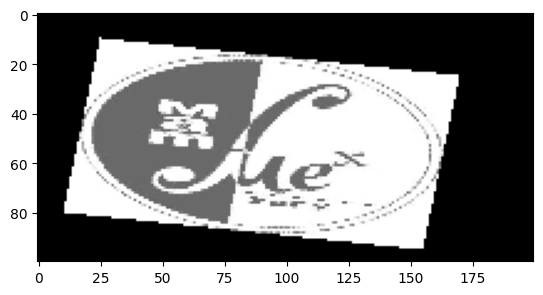

In [21]:
try:
    import matplotlib.pyplot as plt, imageio
except ImportError:
    !pip3 install imageio matplotlib
    import matplotlib.pyplot as plt, imageio

img = imageio.v2.imread('https://imgur.com/CHPOlZD.png').T
p0 = np.array([25,10])
p1 = np.array([170,25])
p2 = np.array([10,80])
scene = np.zeros([200, 100])
for x in range(scene.shape[0]):
    for y in range(scene.shape[1]):
        scene[x,y] = get_pixel(p0, p1, p2, np.array([x,y]), img)
plt.imshow(scene.T, cmap='gray')

**5. Поворот на 90 градусов.**
Допишите функцию, которая поворачивает вектор на 90 градусов против часовой стрелки (напомним, что векторы заданы своими координатами в правом ортонормированном базисе и, значит, вектор с координатами $\left(\begin{array}{c}1\\0\end{array}\right)$ при повороте отображается в $\left(\begin{array}{c}0\\1\end{array}\right)$).

In [7]:
def rotate90(x):
    '''Повернуть x на 90 градусов против часовой стрелки'''
    # здесь мог бы быть ваш код
    return np.array([0.0, 0.0])

Проверьте, что ваше решение проходит тесты:

In [8]:
y1 = rotate90(np.array([0,1]))
y2 = rotate90(np.array([1,0]))
y3 = rotate90(np.array([1,1]))
if abs(y1[0] - -1) >= 1e-9 or abs(y1[1]) >= 1e-9:
    print('Тест 1 не пройден')
elif abs(y2[0]) >= 1e-9 or abs(y2[1] - 1) >= 1e-9:
    print('Тест 2 не пройден')
elif abs(y3[0] - -1) >= 1e-9 or abs(y3[1] - 1) >= 1e-9:
    print('Тест 3 не пройден')
else:
    print('Все тесты пройдены')

Тест 1 не пройден


**6. Полуплоскости.**
Вам дан отрезок, концы которого заданы радиус-векторами $\vec{x}$ и $\vec{y}$ ($\vec{x} \ne \vec{y}$). Прямая, проходящая через этот отрезок, разбивает плоскость на две полуплоскости: левую, если стоять в точке $\vec{x}$ и смотреть в направлении $\vec{y} - \vec{x}$, и правую соответственно. Допишите функцию, которая возвращает -1, если данная точка, заданная радиус-вектором $\vec{z}$, лежит в левой полуплоскости, возвращает 1, если лежит в правой полуплоскости, и 0, если лежит на прямой, проходящей через отрезок. Напоминаем, что все векторы заданы своими координатами в правом ортонормированном базисе.

In [9]:
def halfplane(x, y, z):
    '''-1/1, если z лежит в левой/правой полуплоскости от [x,0], или 0'''
    # здесь мог бы быть ваш код
    return 0

Проверьте, что ваше решение проходит тесты:

In [10]:
if halfplane(np.array([0,0]), np.array([1,2]), np.array([-0.5,-1])) != 0:
    print('Тест 1 не пройден')
elif halfplane(np.array([0,0]), np.array([8,1]), np.array([-5,0])) != -1:
    print('Тест 2 не пройден')
elif halfplane(np.array([1,1]), np.array([0,0]), np.array([-4,-3])) != 1:
    print('Тест 3 не пройден')
else:
    print('Все тесты пройдены')

Тест 2 не пройден


**7. В треугольнике.** Допишите функцию, которая по трём точкам `a`, `b`, `c` и точке `x` проверяет, лежит ли `x` в треугольнике с вершинами `a`, `b`, `c`. Все точки заданы радиус-векторами.

In [11]:
def in_triangle(x, a, b, c):
    '''Вернуть True, если x лежит в треугольнике abc, и False, если нет'''
    # здесь мог бы быть ваш код
    return False

Проверьте, что ваше решение проходит тесты:

In [12]:
if not in_triangle(np.array([0,0.5]), np.array([-1,-1]), np.array([0,2]), np.array([1,-0.5])):
    print('Тест 1 не пройден')
elif in_triangle(np.array([1.5,0.5]), np.array([1,2]), np.array([3,3]), np.array([2,0])):
    print('Тест 2 не пройден')
else:
    print('Все тесты пройдены')

Тест 1 не пройден
